In [1]:
#Library
from keras.datasets import mnist

In [2]:
#train-test spilt
(train_images,train_labels) = mnist.load_data()[0] # datasette 0. indexs trainleri ifade eder
(test_images,test_labels) = mnist.load_data()[1]   # datasette 1. indexs testleri ifade eder

print("Shape of Train Images:", train_images.shape) #(6000 tane train images var, boyutları 28 , 28)
print("Shape of Test Images:", test_images.shape)

Shape of Train Images: (60000, 28, 28)
Shape of Test Images: (10000, 28, 28)


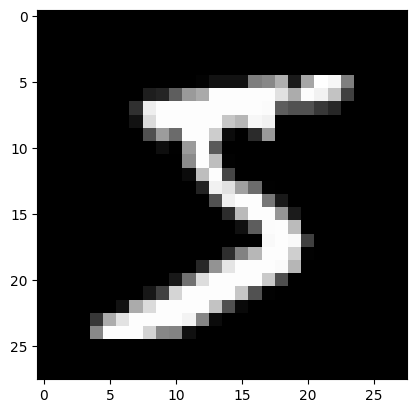

In [3]:
import matplotlib.pyplot as plt

plt.imshow(train_images[0], cmap="gray") #gray_r cmap renk değiştirir
plt.show()

In [4]:
#preparing data
# elimizdeki veriler 3 boyutlu bunları 4 boyutlu yapmamız lazım

"""
3D--> 4D Numpy array
Normalizations: data/255 sıfırla bir arasına sıkıştırmak

"""

train_images = train_images.reshape(train_images.shape[0],28,28,1) # 3D ---> 4D completed
test_images = test_images.reshape(test_images.shape[0],28,28,1)  # 3D ---> 4D completed

print("Shape of Train Images:", train_images.shape) 
print("Shape of Test Images:", test_images.shape)

# Normalizations: /255

train_images = train_images.astype("float32") #float yaptık çünkü resimleri 255 e böldüğümüz zaman 0 ve 1 arasında olacak
test_images = test_images.astype("float32")

train_images = train_images / 255
test_images /= 255

Shape of Train Images: (60000, 28, 28, 1)
Shape of Test Images: (10000, 28, 28, 1)


In [5]:
input_shape = (28, 28, 1)

In [6]:
#Library
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D # CNN katmanları

# creating network


model = Sequential()

model.add(Conv2D(28,kernel_size = (3,3),input_shape = input_shape)) # 28 boyut

model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(128,activation="relu"))

model.add(Dropout(0.2)) #yakınsamada yardımcı olur

model.add(Dense(10,activation="softmax")) # 10 çıktı sayısı en sonki


In [7]:
#compiling model

model.compile(optimizer="adam",
             loss = "sparse_categorical_crossentropy",
             metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 128)               605824    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [8]:
#fitting model
#eğitim gerçekleştirmek

history = model.fit(x = train_images,
                    y = train_labels,
                    epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2007 - accuracy: 0.9391
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0839 - accuracy: 0.9744
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0614 - accuracy: 0.9808
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0476 - accuracy: 0.9847
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0383 - accuracy: 0.9880
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0307 - accuracy: 0.9900
Epoch 7/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0273 - accuracy: 0.9906
Epoch 8/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0202 - accuracy: 0.9933
Epoch 9/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0211 - accuracy: 0.9927
Epoch 10/10
1875/1875 [==============================] - 17s 9ms/step - l

In [9]:
#evaluating model
test_loss, test_accuracy = model.evaluate(test_images,test_labels)
print("Test Loss (kayıp):",test_loss)
print("Test Accuracy (Doğruluk):",test_accuracy)


313/313 [==============================] - 2s 4ms/step - loss: 0.0603 - accuracy: 0.9847
Test Loss (kayıp): 0.06027251482009888
Test Accuracy (Doğruluk): 0.9847000241279602


In [10]:
history_dict = history.history
print("History: ",history_dict)
print("Keys: ",history_dict.keys())

History:  {'loss': [0.2007489651441574, 0.08387760072946548, 0.06140134111046791, 0.04755695164203644, 0.03834180533885956, 0.030705364421010017, 0.027286337688565254, 0.020161069929599762, 0.02114814706146717, 0.01876640133559704], 'accuracy': [0.9391166567802429, 0.9743666648864746, 0.980816662311554, 0.9846500158309937, 0.9879999756813049, 0.9900000095367432, 0.9905666708946228, 0.9933000206947327, 0.9926999807357788, 0.9933500289916992]}
Keys:  dict_keys(['loss', 'accuracy'])


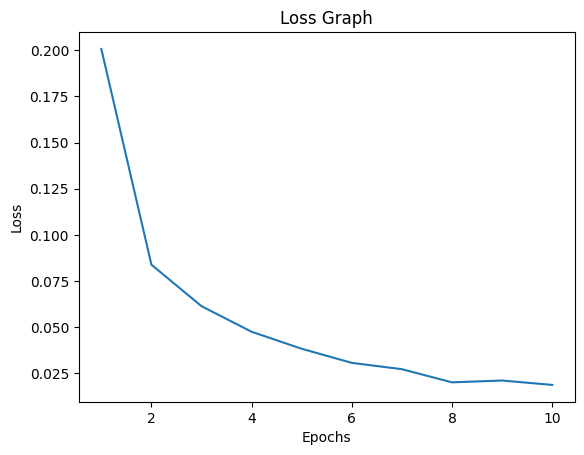

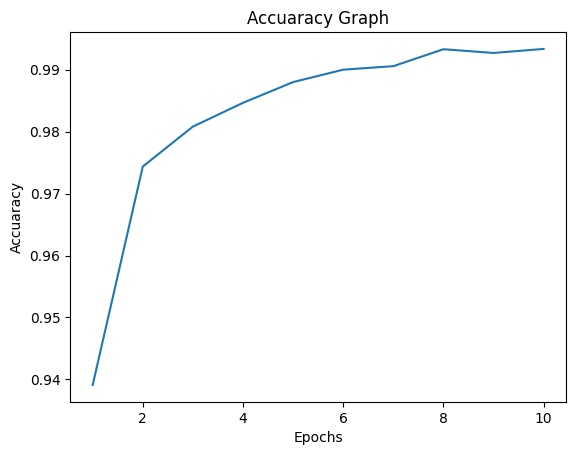

In [11]:
# Loss Accuracy Graph
import matplotlib.pyplot as plt

epochs = range(1,11) #adım sayısı
loss = history_dict["loss"]
accuaracy = history_dict["accuracy"]

plt.plot(epochs, loss)
plt.title("Loss Graph")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

plt.plot(epochs, accuaracy)
plt.title("Accuaracy Graph")
plt.xlabel("Epochs")
plt.ylabel("Accuaracy")
plt.show()

In [12]:
# saving model

model.save("mnist_model.h5")

1/1 [==============================] - 0s 54ms/step
Prediction Array: [[1.0000000e+00 7.7115912e-15 7.2958532e-12 2.9138651e-16 6.9512362e-14
  7.3515387e-18 3.0270019e-11 1.1910766e-12 3.4455365e-15 6.0840954e-10]]
Predicted Number: 0


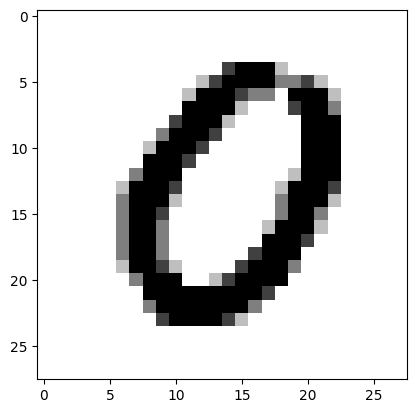

In [18]:
#Load model and 
from keras.models import load_model
import random

model = load_model("mnist_model.h5")

#prediction

i = random.randint(1,1000)

prediction = model.predict(test_images[i].reshape(1,28,28,1))#list döndrür yüzde ihtimaller üzerinden 0,1,2,3,4,5,6,7,8,9 olduğunu döndürür
print("Prediction Array:",prediction)
print("Predicted Number:",prediction.argmax())#top ihtimali verir

plt.imshow(test_images[i].reshape(28,28),cmap="gray_r")
plt.show()
